In [1]:
import os
os.chdir('../')

In [2]:
import normet.intervention as interv

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_excel(r'./normet/datasets/Intervention/ChinaAQ_Weekly.xlsx',parse_dates=['date'])

In [5]:
df=df.query(f"date>='2015-05-01'").query(f"date<'2016-04-30'")

In [6]:
control_pool=["Dongguan", "Zhongshan" , "Foshan", "Beihai"
               , "Nanning","Nanchang" , "Xiamen", "Taizhou" 
               , "Ningbo","Guangzhou" , "Huizhou", "Hangzhou" 
               , "Liuzhou", "Shantou", "Jiangmen", "Heyuan", "Quanzhou","Haikou" , "Shenzhen", "Wenzhou", "Huzhou"
               , "Zhuhai", "Fuzhou", "Shaoxing", "Zhaoqing","Zhoushan"  
               , "Quzhou", "Jinhua", "Shaoguan" , "Sanya"
               , "Jieyang" , "Meizhou", "Shanwei" 
               , "Zhanjiang" , "Chaozhou", "Maoming" , "Yangjiang"]

In [7]:
df=df[df['ID'].isin(control_pool+["2+26 cities"])]

In [8]:
df.head()

,date,ID,CO,COwn,NO2,NO2wn,O3,O3_8h,O3_8hwn,O3wn,Ox,Oxwn,PM10,PM10wn,PM2.5,PM2.5wn,SO2,SO2wn
552,2015-05-03,2+26 cities,1.277812,1.328918,38.484623,45.068304,83.690318,133.060175,90.980089,65.825884,60.984249,54.415501,134.523758,139.447383,82.221006,73.876656,32.971551,36.822724
560,2015-05-10,2+26 cities,1.113243,1.298979,35.289414,44.352582,70.075957,103.363985,90.875789,66.100641,52.659234,54.337364,111.771975,134.412595,58.313419,69.386309,27.898696,35.284317
568,2015-05-17,2+26 cities,0.996762,1.274902,35.810778,43.981644,83.598553,125.082867,91.245896,66.418891,59.588514,54.389203,117.075504,129.474025,52.802738,67.146002,29.642007,34.742172
576,2015-05-24,2+26 cities,1.031094,1.267058,39.838150,43.398110,96.838000,149.709652,92.792728,66.695864,68.180477,54.529002,117.650986,121.537391,61.278043,65.876502,34.972942,34.482513
584,2015-05-31,2+26 cities,1.297053,1.285556,37.988483,43.548340,109.770206,165.029315,92.427553,66.419975,73.600167,54.475052,143.115653,126.681810,88.963408,67.239277,33.903061,34.490734


In [9]:
df['after_treatment']=df['date']>'2015-10-23'

In [10]:
xx=interv.scm(df,'SO2wn','date','ID',"2+26 cities",control_pool,'after_treatment')

In [11]:
xy=interv.scm_parallel(df,'SO2wn','date','ID',control_pool,'after_treatment')

<Axes: xlabel='date'>

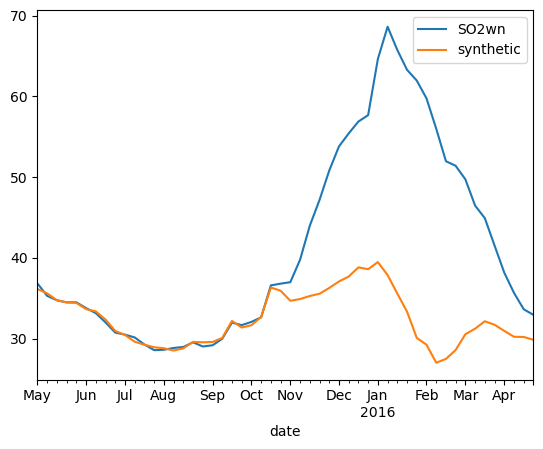

In [12]:
xx[['SO2wn','synthetic']].plot()

In [13]:
xz=interv.sdid_effects(df,'SO2wn','date','ID','2+26 cities',control_pool,'after_treatment')

In [14]:
xm=interv.sdid_parallel(df,'SO2wn','date','ID',control_pool,'after_treatment')

In [15]:
import matplotlib.pyplot as plt

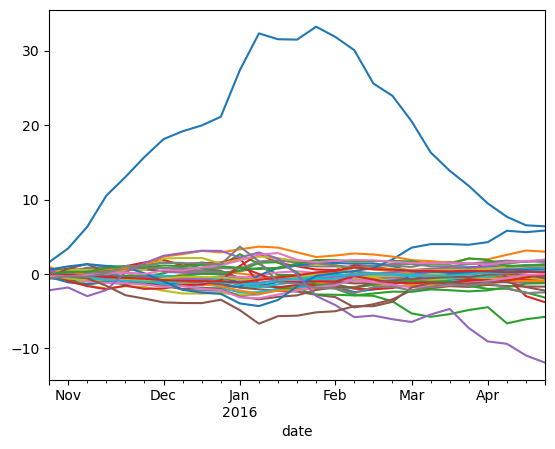

In [16]:
fig,ax=plt.subplots()
for i,city in enumerate(list(xm['ID'].unique())):
    xm[xm['ID']==city]['effects'].plot(ax=ax)

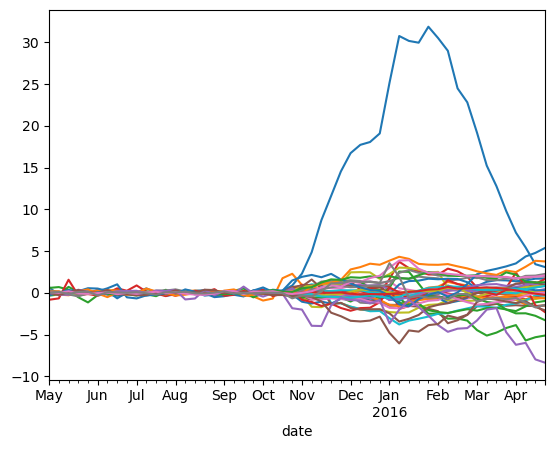

In [17]:
fig,ax=plt.subplots()
for i,city in enumerate(list(xy['ID'].unique())):
    xy[xy['ID']==city]['effects'].plot(ax=ax)

In [18]:
xs=interv.ml_synthetic(df,'SO2wn','date','ID','2+26 cities',control_pool,'2015-10-23',60)

[flaml.automl.automl: 06-14 16:37:27] {2726} INFO - task = regression
[flaml.automl.automl: 06-14 16:37:27] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 06-14 16:37:27] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 06-14 16:37:27] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 06-14 16:37:27] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 06-14 16:37:27] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 06-14 16:37:27] {3472} INFO - Estimated sufficient time budget=208s. Estimated necessary time budget=1s.
[flaml.automl.automl: 06-14 16:37:27] {3519} INFO -  at 0.0s,	estimator lgbm's best error=4.2085,	best estimator lgbm's best error=4.2085
[flaml.automl.automl: 06-14 16:37:27] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 06-14 16:37:27] {3519} INFO -  at 0.1s,	estimator lgbm's best error=4.2085,	best estimator 

[flaml.automl.automl: 06-14 16:37:28] {3334} INFO - iteration 34, current learner lgbm
[flaml.automl.automl: 06-14 16:37:28] {3519} INFO -  at 1.6s,	estimator lgbm's best error=4.2085,	best estimator rf's best error=0.1996
[flaml.automl.automl: 06-14 16:37:28] {3334} INFO - iteration 35, current learner lgbm
[flaml.automl.automl: 06-14 16:37:29] {3519} INFO -  at 1.6s,	estimator lgbm's best error=4.2085,	best estimator rf's best error=0.1996
[flaml.automl.automl: 06-14 16:37:29] {3334} INFO - iteration 36, current learner rf
[flaml.automl.automl: 06-14 16:37:29] {3519} INFO -  at 1.7s,	estimator rf's best error=0.1996,	best estimator rf's best error=0.1996
[flaml.automl.automl: 06-14 16:37:29] {3334} INFO - iteration 37, current learner rf
[flaml.automl.automl: 06-14 16:37:29] {3519} INFO -  at 1.8s,	estimator rf's best error=0.1996,	best estimator rf's best error=0.1996
[flaml.automl.automl: 06-14 16:37:29] {3334} INFO - iteration 38, current learner rf
[flaml.automl.automl: 06-14 16:

[flaml.automl.automl: 06-14 16:37:30] {3334} INFO - iteration 71, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:30] {3519} INFO -  at 3.3s,	estimator xgb_limitdepth's best error=0.3101,	best estimator rf's best error=0.1996
[flaml.automl.automl: 06-14 16:37:30] {3334} INFO - iteration 72, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:30] {3519} INFO -  at 3.4s,	estimator xgb_limitdepth's best error=0.3101,	best estimator rf's best error=0.1996
[flaml.automl.automl: 06-14 16:37:30] {3334} INFO - iteration 73, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:30] {3519} INFO -  at 3.4s,	estimator xgb_limitdepth's best error=0.3101,	best estimator rf's best error=0.1996
[flaml.automl.automl: 06-14 16:37:30] {3334} INFO - iteration 74, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:30] {3519} INFO -  at 3.5s,	estimator xgb_limitdepth's best error=0.3101,	best estimator rf's best error=0.1996
[flaml.automl.automl: 06-14 

[flaml.automl.automl: 06-14 16:37:32] {3334} INFO - iteration 106, current learner rf
[flaml.automl.automl: 06-14 16:37:32] {3519} INFO -  at 5.2s,	estimator rf's best error=0.1996,	best estimator rf's best error=0.1996
[flaml.automl.automl: 06-14 16:37:32] {3334} INFO - iteration 107, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:32] {3519} INFO -  at 5.2s,	estimator xgb_limitdepth's best error=0.2053,	best estimator rf's best error=0.1996
[flaml.automl.automl: 06-14 16:37:32] {3334} INFO - iteration 108, current learner lgbm
[flaml.automl.automl: 06-14 16:37:32] {3519} INFO -  at 5.2s,	estimator lgbm's best error=2.1528,	best estimator rf's best error=0.1996
[flaml.automl.automl: 06-14 16:37:32] {3334} INFO - iteration 109, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:32] {3519} INFO -  at 5.3s,	estimator xgb_limitdepth's best error=0.2053,	best estimator rf's best error=0.1996
[flaml.automl.automl: 06-14 16:37:32] {3334} INFO - iteration 110, c

[flaml.automl.automl: 06-14 16:37:34] {3334} INFO - iteration 140, current learner xgboost
[flaml.automl.automl: 06-14 16:37:34] {3519} INFO -  at 6.9s,	estimator xgboost's best error=1.6981,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:34] {3334} INFO - iteration 141, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:34] {3519} INFO -  at 7.0s,	estimator xgb_limitdepth's best error=0.1692,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:34] {3334} INFO - iteration 142, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:34] {3519} INFO -  at 7.0s,	estimator xgb_limitdepth's best error=0.1692,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:34] {3334} INFO - iteration 143, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:34] {3519} INFO -  at 7.1s,	estimator xgb_limitdepth's best error=0.1692,	best estimator xgb_limitdepth's best err

[flaml.automl.automl: 06-14 16:37:36] {3519} INFO -  at 9.1s,	estimator xgb_limitdepth's best error=0.1692,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:36] {3334} INFO - iteration 174, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:36] {3519} INFO -  at 9.1s,	estimator xgb_limitdepth's best error=0.1692,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:36] {3334} INFO - iteration 175, current learner xgboost
[flaml.automl.automl: 06-14 16:37:36] {3519} INFO -  at 9.2s,	estimator xgboost's best error=0.8802,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:36] {3334} INFO - iteration 176, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:36] {3519} INFO -  at 9.2s,	estimator xgb_limitdepth's best error=0.1692,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:36] {3334} INFO - iteration 177, current learner xgb_l

[flaml.automl.automl: 06-14 16:37:38] {3519} INFO -  at 11.0s,	estimator extra_tree's best error=0.1726,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:38] {3334} INFO - iteration 207, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:38] {3519} INFO -  at 11.0s,	estimator xgb_limitdepth's best error=0.1692,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:38] {3334} INFO - iteration 208, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:38] {3519} INFO -  at 11.1s,	estimator extra_tree's best error=0.1726,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:38] {3334} INFO - iteration 209, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:38] {3519} INFO -  at 11.1s,	estimator extra_tree's best error=0.1726,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:38] {3334} INFO - iteration 210, current learner extra_t

[flaml.automl.automl: 06-14 16:37:40] {3519} INFO -  at 12.9s,	estimator extra_tree's best error=0.1726,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:40] {3334} INFO - iteration 240, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:40] {3519} INFO -  at 12.9s,	estimator extra_tree's best error=0.1726,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:40] {3334} INFO - iteration 241, current learner rf
[flaml.automl.automl: 06-14 16:37:40] {3519} INFO -  at 13.0s,	estimator rf's best error=0.1996,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:40] {3334} INFO - iteration 242, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:40] {3519} INFO -  at 13.1s,	estimator extra_tree's best error=0.1726,	best estimator xgb_limitdepth's best error=0.1692
[flaml.automl.automl: 06-14 16:37:40] {3334} INFO - iteration 243, current learner extra_tree
[flaml.automl.automl

[flaml.automl.automl: 06-14 16:37:42] {3334} INFO - iteration 273, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:42] {3519} INFO -  at 14.7s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:42] {3334} INFO - iteration 274, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:42] {3519} INFO -  at 14.8s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:42] {3334} INFO - iteration 275, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:42] {3519} INFO -  at 14.8s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:42] {3334} INFO - iteration 276, current learner xgboost
[flaml.automl.automl: 06-14 16:37:42] {3519} INFO -  at 14.9s,	estimator xgboost's best error=0.8802,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-1

[flaml.automl.automl: 06-14 16:37:43] {3334} INFO - iteration 307, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:43] {3519} INFO -  at 16.6s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:43] {3334} INFO - iteration 308, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:44] {3519} INFO -  at 16.7s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:44] {3334} INFO - iteration 309, current learner xgboost
[flaml.automl.automl: 06-14 16:37:44] {3519} INFO -  at 16.7s,	estimator xgboost's best error=0.8802,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:44] {3334} INFO - iteration 310, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:44] {3519} INFO -  at 16.8s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-1

[flaml.automl.automl: 06-14 16:37:46] {3334} INFO - iteration 341, current learner xgboost
[flaml.automl.automl: 06-14 16:37:46] {3519} INFO -  at 19.5s,	estimator xgboost's best error=0.5694,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:46] {3334} INFO - iteration 342, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:46] {3519} INFO -  at 19.5s,	estimator xgb_limitdepth's best error=0.1692,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:46] {3334} INFO - iteration 343, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:46] {3519} INFO -  at 19.6s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:46] {3334} INFO - iteration 344, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:47] {3519} INFO -  at 19.7s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.auto

[flaml.automl.automl: 06-14 16:37:49] {3334} INFO - iteration 375, current learner xgboost
[flaml.automl.automl: 06-14 16:37:49] {3519} INFO -  at 22.3s,	estimator xgboost's best error=0.5694,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:49] {3334} INFO - iteration 376, current learner lgbm
[flaml.automl.automl: 06-14 16:37:49] {3519} INFO -  at 22.3s,	estimator lgbm's best error=1.5134,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:49] {3334} INFO - iteration 377, current learner lgbm
[flaml.automl.automl: 06-14 16:37:49] {3519} INFO -  at 22.3s,	estimator lgbm's best error=1.5134,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:49] {3334} INFO - iteration 378, current learner lgbm
[flaml.automl.automl: 06-14 16:37:49] {3519} INFO -  at 22.3s,	estimator lgbm's best error=0.8555,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:49] {3334} INFO - iteration 

[flaml.automl.automl: 06-14 16:37:51] {3334} INFO - iteration 410, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:37:51] {3519} INFO -  at 24.2s,	estimator xgb_limitdepth's best error=0.1692,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:51] {3334} INFO - iteration 411, current learner xgboost
[flaml.automl.automl: 06-14 16:37:51] {3519} INFO -  at 24.3s,	estimator xgboost's best error=0.4538,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:51] {3334} INFO - iteration 412, current learner xgboost
[flaml.automl.automl: 06-14 16:37:51] {3519} INFO -  at 24.3s,	estimator xgboost's best error=0.4538,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:51] {3334} INFO - iteration 413, current learner rf
[flaml.automl.automl: 06-14 16:37:51] {3519} INFO -  at 24.4s,	estimator rf's best error=0.1996,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:51] {3

[flaml.automl.automl: 06-14 16:37:54] {3519} INFO -  at 27.1s,	estimator rf's best error=0.1996,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:54] {3334} INFO - iteration 445, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:54] {3519} INFO -  at 27.2s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:54] {3334} INFO - iteration 446, current learner lgbm
[flaml.automl.automl: 06-14 16:37:54] {3519} INFO -  at 27.2s,	estimator lgbm's best error=0.4763,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:54] {3334} INFO - iteration 447, current learner lgbm
[flaml.automl.automl: 06-14 16:37:54] {3519} INFO -  at 27.3s,	estimator lgbm's best error=0.3244,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:54] {3334} INFO - iteration 448, current learner lgbm
[flaml.automl.automl: 06-14 16:37:54] {3519} INFO -  at 27

[flaml.automl.automl: 06-14 16:37:56] {3519} INFO -  at 28.7s,	estimator xgb_limitdepth's best error=0.1692,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:56] {3334} INFO - iteration 480, current learner lgbm
[flaml.automl.automl: 06-14 16:37:56] {3519} INFO -  at 28.7s,	estimator lgbm's best error=0.3244,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:56] {3334} INFO - iteration 481, current learner xgboost
[flaml.automl.automl: 06-14 16:37:56] {3519} INFO -  at 28.8s,	estimator xgboost's best error=0.4538,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:56] {3334} INFO - iteration 482, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:56] {3519} INFO -  at 28.9s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:56] {3334} INFO - iteration 483, current learner lgbm
[flaml.automl.automl: 06-14 16:37:56] {3

[flaml.automl.automl: 06-14 16:37:57] {3334} INFO - iteration 514, current learner lgbm
[flaml.automl.automl: 06-14 16:37:57] {3519} INFO -  at 30.4s,	estimator lgbm's best error=0.3244,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:57] {3334} INFO - iteration 515, current learner xgboost
[flaml.automl.automl: 06-14 16:37:57] {3519} INFO -  at 30.4s,	estimator xgboost's best error=0.4538,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:57] {3334} INFO - iteration 516, current learner lgbm
[flaml.automl.automl: 06-14 16:37:57] {3519} INFO -  at 30.4s,	estimator lgbm's best error=0.3244,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:57] {3334} INFO - iteration 517, current learner lgbm
[flaml.automl.automl: 06-14 16:37:57] {3519} INFO -  at 30.5s,	estimator lgbm's best error=0.3244,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:57] {3334} INFO - iteration 

[flaml.automl.automl: 06-14 16:37:59] {3334} INFO - iteration 549, current learner lgbm
[flaml.automl.automl: 06-14 16:37:59] {3519} INFO -  at 32.4s,	estimator lgbm's best error=0.3244,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:59] {3334} INFO - iteration 550, current learner lgbm
[flaml.automl.automl: 06-14 16:37:59] {3519} INFO -  at 32.5s,	estimator lgbm's best error=0.3244,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:59] {3334} INFO - iteration 551, current learner extra_tree
[flaml.automl.automl: 06-14 16:37:59] {3519} INFO -  at 32.6s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:59] {3334} INFO - iteration 552, current learner lgbm
[flaml.automl.automl: 06-14 16:37:59] {3519} INFO -  at 32.6s,	estimator lgbm's best error=0.3244,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:37:59] {3334} INFO - iter

[flaml.automl.automl: 06-14 16:38:02] {3519} INFO -  at 34.8s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:02] {3334} INFO - iteration 584, current learner lgbm
[flaml.automl.automl: 06-14 16:38:02] {3519} INFO -  at 34.9s,	estimator lgbm's best error=0.3244,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:02] {3334} INFO - iteration 585, current learner extra_tree
[flaml.automl.automl: 06-14 16:38:02] {3519} INFO -  at 35.0s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:02] {3334} INFO - iteration 586, current learner lgbm
[flaml.automl.automl: 06-14 16:38:02] {3519} INFO -  at 35.0s,	estimator lgbm's best error=0.3244,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:02] {3334} INFO - iteration 587, current learner extra_tree
[flaml.automl.automl: 06-14 16:38:02] {3519}

[flaml.automl.automl: 06-14 16:38:04] {3334} INFO - iteration 618, current learner rf
[flaml.automl.automl: 06-14 16:38:04] {3519} INFO -  at 37.1s,	estimator rf's best error=0.1996,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:04] {3334} INFO - iteration 619, current learner lgbm
[flaml.automl.automl: 06-14 16:38:04] {3519} INFO -  at 37.1s,	estimator lgbm's best error=0.3244,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:04] {3334} INFO - iteration 620, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:38:04] {3519} INFO -  at 37.2s,	estimator xgb_limitdepth's best error=0.1692,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:04] {3334} INFO - iteration 621, current learner lgbm
[flaml.automl.automl: 06-14 16:38:04] {3519} INFO -  at 37.2s,	estimator lgbm's best error=0.2656,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:04] {3334} INFO - 

[flaml.automl.automl: 06-14 16:38:06] {3519} INFO -  at 39.2s,	estimator lgbm's best error=0.2656,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:06] {3334} INFO - iteration 653, current learner xgboost
[flaml.automl.automl: 06-14 16:38:06] {3519} INFO -  at 39.3s,	estimator xgboost's best error=0.4538,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:06] {3334} INFO - iteration 654, current learner rf
[flaml.automl.automl: 06-14 16:38:06] {3519} INFO -  at 39.4s,	estimator rf's best error=0.1996,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:06] {3334} INFO - iteration 655, current learner rf
[flaml.automl.automl: 06-14 16:38:06] {3519} INFO -  at 39.4s,	estimator rf's best error=0.1996,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:06] {3334} INFO - iteration 656, current learner lgbm
[flaml.automl.automl: 06-14 16:38:06] {3519} INFO -  at 39.5s,	estimat

[flaml.automl.automl: 06-14 16:38:08] {3334} INFO - iteration 687, current learner extra_tree
[flaml.automl.automl: 06-14 16:38:08] {3519} INFO -  at 41.4s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:08] {3334} INFO - iteration 688, current learner extra_tree
[flaml.automl.automl: 06-14 16:38:08] {3519} INFO -  at 41.5s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:08] {3334} INFO - iteration 689, current learner rf
[flaml.automl.automl: 06-14 16:38:08] {3519} INFO -  at 41.6s,	estimator rf's best error=0.1996,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:08] {3334} INFO - iteration 690, current learner extra_tree
[flaml.automl.automl: 06-14 16:38:09] {3519} INFO -  at 41.7s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:09

[flaml.automl.automl: 06-14 16:38:11] {3519} INFO -  at 43.8s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:11] {3334} INFO - iteration 722, current learner xgboost
[flaml.automl.automl: 06-14 16:38:11] {3519} INFO -  at 43.9s,	estimator xgboost's best error=0.4538,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:11] {3334} INFO - iteration 723, current learner extra_tree
[flaml.automl.automl: 06-14 16:38:11] {3519} INFO -  at 44.0s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:11] {3334} INFO - iteration 724, current learner lgbm
[flaml.automl.automl: 06-14 16:38:11] {3519} INFO -  at 44.0s,	estimator lgbm's best error=0.2656,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:11] {3334} INFO - iteration 725, current learner xgboost
[flaml.automl.automl: 06-14 16:38:11] {35

[flaml.automl.automl: 06-14 16:38:13] {3519} INFO -  at 46.1s,	estimator xgboost's best error=0.4538,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:13] {3334} INFO - iteration 756, current learner lgbm
[flaml.automl.automl: 06-14 16:38:13] {3519} INFO -  at 46.1s,	estimator lgbm's best error=0.2656,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:13] {3334} INFO - iteration 757, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:38:13] {3519} INFO -  at 46.2s,	estimator xgb_limitdepth's best error=0.1692,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:13] {3334} INFO - iteration 758, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:38:13] {3519} INFO -  at 46.3s,	estimator xgb_limitdepth's best error=0.1692,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:13] {3334} INFO - iteration 759, current learner xgboost
[flaml.automl.automl: 

[flaml.automl.automl: 06-14 16:38:15] {3334} INFO - iteration 790, current learner rf
[flaml.automl.automl: 06-14 16:38:16] {3519} INFO -  at 48.7s,	estimator rf's best error=0.1996,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:16] {3334} INFO - iteration 791, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:38:16] {3519} INFO -  at 48.7s,	estimator xgb_limitdepth's best error=0.1692,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:16] {3334} INFO - iteration 792, current learner extra_tree
[flaml.automl.automl: 06-14 16:38:16] {3519} INFO -  at 48.9s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:16] {3334} INFO - iteration 793, current learner rf
[flaml.automl.automl: 06-14 16:38:16] {3519} INFO -  at 48.9s,	estimator rf's best error=0.1996,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:16] {3334}

[flaml.automl.automl: 06-14 16:38:18] {3519} INFO -  at 51.4s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:18] {3334} INFO - iteration 825, current learner extra_tree
[flaml.automl.automl: 06-14 16:38:18] {3519} INFO -  at 51.5s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:18] {3334} INFO - iteration 826, current learner rf
[flaml.automl.automl: 06-14 16:38:18] {3519} INFO -  at 51.5s,	estimator rf's best error=0.1996,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:18] {3334} INFO - iteration 827, current learner extra_tree
[flaml.automl.automl: 06-14 16:38:19] {3519} INFO -  at 51.6s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:19] {3334} INFO - iteration 828, current learner lgbm
[flaml.automl.automl: 06-14 16:38:19] {351

[flaml.automl.automl: 06-14 16:38:21] {3334} INFO - iteration 859, current learner xgboost
[flaml.automl.automl: 06-14 16:38:21] {3519} INFO -  at 53.8s,	estimator xgboost's best error=0.4538,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:21] {3334} INFO - iteration 860, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:38:21] {3519} INFO -  at 53.8s,	estimator xgb_limitdepth's best error=0.1692,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:21] {3334} INFO - iteration 861, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:38:21] {3519} INFO -  at 53.9s,	estimator xgb_limitdepth's best error=0.1692,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:21] {3334} INFO - iteration 862, current learner extra_tree
[flaml.automl.automl: 06-14 16:38:21] {3519} INFO -  at 54.0s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.aut

[flaml.automl.automl: 06-14 16:38:23] {3519} INFO -  at 56.2s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:23] {3334} INFO - iteration 894, current learner rf
[flaml.automl.automl: 06-14 16:38:23] {3519} INFO -  at 56.2s,	estimator rf's best error=0.1996,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:23] {3334} INFO - iteration 895, current learner lgbm
[flaml.automl.automl: 06-14 16:38:23] {3519} INFO -  at 56.3s,	estimator lgbm's best error=0.2656,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:23] {3334} INFO - iteration 896, current learner xgboost
[flaml.automl.automl: 06-14 16:38:23] {3519} INFO -  at 56.3s,	estimator xgboost's best error=0.4538,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:23] {3334} INFO - iteration 897, current learner rf
[flaml.automl.automl: 06-14 16:38:23] {3519} INFO -  at 56.4s,

[flaml.automl.automl: 06-14 16:38:25] {3334} INFO - iteration 928, current learner extra_tree
[flaml.automl.automl: 06-14 16:38:25] {3519} INFO -  at 58.4s,	estimator extra_tree's best error=0.1353,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:25] {3334} INFO - iteration 929, current learner xgboost
[flaml.automl.automl: 06-14 16:38:25] {3519} INFO -  at 58.4s,	estimator xgboost's best error=0.4538,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:25] {3334} INFO - iteration 930, current learner xgboost
[flaml.automl.automl: 06-14 16:38:25] {3519} INFO -  at 58.5s,	estimator xgboost's best error=0.4538,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06-14 16:38:25] {3334} INFO - iteration 931, current learner xgb_limitdepth
[flaml.automl.automl: 06-14 16:38:25] {3519} INFO -  at 58.6s,	estimator xgb_limitdepth's best error=0.1692,	best estimator extra_tree's best error=0.1353
[flaml.automl.automl: 06

<Axes: xlabel='date'>

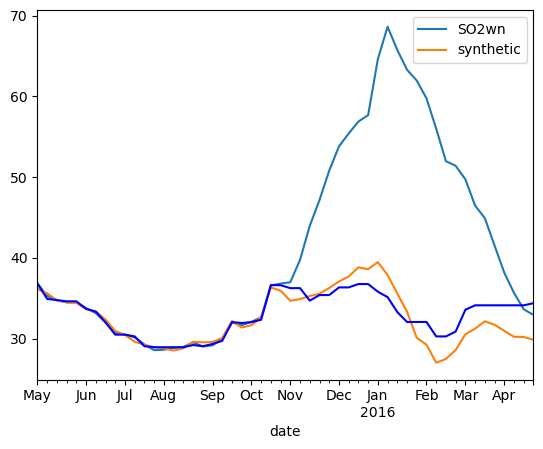

In [26]:
fig,ax=plt.subplots()
xx[['SO2wn','synthetic']].plot(ax=ax)
xs[0]['synthetic'].plot(c='b',ax=ax)

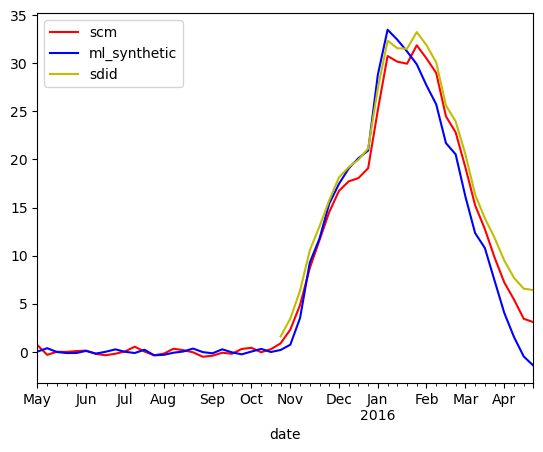

In [31]:
fig,ax=plt.subplots()
xx['effects'].plot(c='r',label='scm',ax=ax)
xs[0]['effects'].plot(c='b',label='ml_synthetic',ax=ax)
xm[xm['ID']=='2+26 cities']['effects'].plot(c='y',label='sdid',ax=ax)
ax.legend()